# **Facial Emotion Detection**

## **Problem Definition**

**The context:**<br>

Deep Learning has proven its effectiveness in many applications where the data sources are unstructured, such as text, audio, and images. For instance, recognizing the type of animal(s) in an image may take a significant amount of time if classified by a human. But the same can be accomplished by deep Learning with significantly less human interaction. Deep learning stacked operations allows it not just to predict the output but also to learn the feature of the data itself, minimizing the domain feature engineering.

Much research in the field of psychology has proven that Facial emotions are very impactful in visual communication and responses and can be helpful in many applications where emotions can play a vital role, such as at physical store kiosks. Another example could be a video game where it's storytelling or NPC response can be changed on the emotions of the player for more immersive experience. A Model trained in recognizing the facial emotions would play a vital role in such applications.


**The objectives:** <br>

The goal of this project is to create a deep learning model that can detect facial emotions accurately. It must classify the images in multi-class depending on the emotions within the image with the associated pattern.

**The key questions:**<br>

Deep Learning can solve many problems but we need to consider what are the important aspects of the solutions we want to achieve

* What is acceptable accuracy? <br>
        Certain applications require very accurate predictions. If accuracy is not so important, what's the acceptable accuracy for the business?<br>
* Application resource constraints<br>
        Deep Learning models are generally compute, and resource intensive, and can, sometime, significant amount of time for better predictions/ fitting. We also need to consider the inferencing of the model, where it would be deployed to consider the constrints of the deployment device constraints.
* Training Data<br>
        Training data are the most crucial part of the deep learning. Deep learning can lear the features on their own but the data needs to be labeled properly/correctly for better accuracy. We also need to look to for distribution within the training data to avoid any imbalance within the classes, and if needed resample/augment the data to minimize it.
* Testing/Validation Data
        We need to make sure we have a either a separate validation data or we need to split the entire data to training, validation, and test data.


**The problem formulation:**

The motivation of the problem here is to create a best-fitting model for the given data set to classify the facial emotions associated with the input images.
With help of data science,
* We can understand the given data samples, understand their features and distribution
* Clean data or augment the data to minimize bias within the sample data for each classifications.
* Analyze different Deep Learning models based on the statistical data of the model such as accuracy, loss.
* Optimize the model by fine tuning the hyper parameter, such as,
 learning rate, batch size, epochs, step-size, of the model.


## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'.
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


## **Mounting the Drive**

**NOTE:**  Please use Google Colab from your browser for this notebook. **Google.colab is NOT a library that can be downloaded locally on your device.**

In [138]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Importing the Libraries**

In [139]:
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Let us load and unzip the data**

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same on your Google drive before executing the code in the next cell.
- In case of any error, please make sure that the path of the file is correct as the path may be different for you.

In [140]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/mit/projects/elective/facial_emotion/Facial_emotion_images.zip'
out_directory = '/content/drive/MyDrive/mit/projects/elective/facial_emotion/'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [141]:
picture_size = 48

In [142]:
folder_path = "Facial_emotion_images/"

In [ ]:
import os.path
folder_path = "D:\\GitHub\\amitprakash07\\snowflake\\data\\data_science_mit\\Facial_emotion_images\\"
out_directory = 'D:\\GitHub\\amitprakash07\\snowflake\\temp\\sandbox\\Facial_emotion_images'
print(folder_path)

D:\GitHub\amitprakash07\snowflake\data\data_science_mit\Facial_emotion_images\


## **Visualizing our Classes**

Let's look at our classes.

**Write down your observation for each class. What do you think can be a unique feature of each emotion, that separates it from the remaining classes?**

### **Happy**

In [143]:
from tensorflow.keras import utils as tf_utils

In [144]:
def show_images(folder_path, expression):
    plt.figure(figsize= (8,8))
    for i in range(1, 10, 1):
        plt.subplot(3, 3, i)

        img = tf_utils.load_img(folder_path + "train/" + expression + "/" +
                      os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
        plt.imshow(img)

    plt.show()

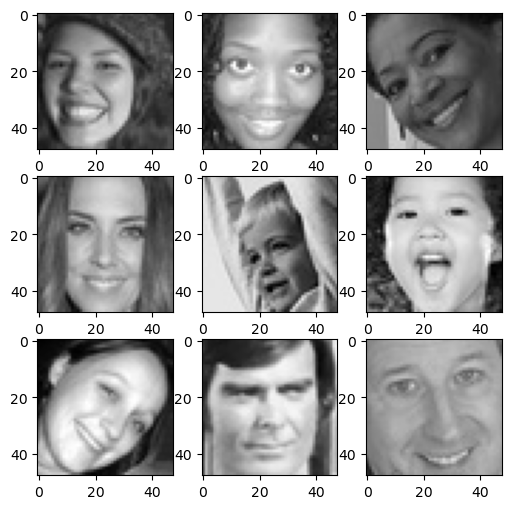

In [18]:
expression = 'happy'
show_images(folder_path, expression)

**Observations and Insights:__**

### **Sad**

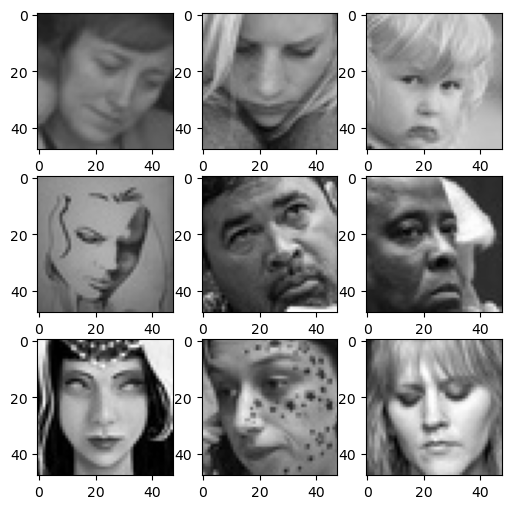

In [19]:
expression = 'sad'
show_images(folder_path, expression)

**Observations and Insights:__**

### **Neutral**

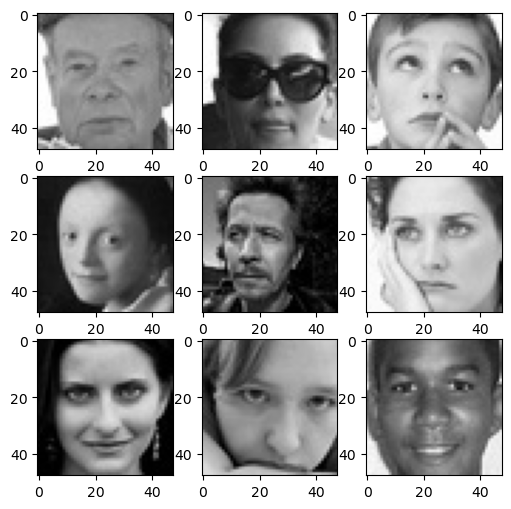

In [20]:
expression = 'neutral'
show_images(folder_path, expression)

**Observations and Insights:__**

### **Surprised**

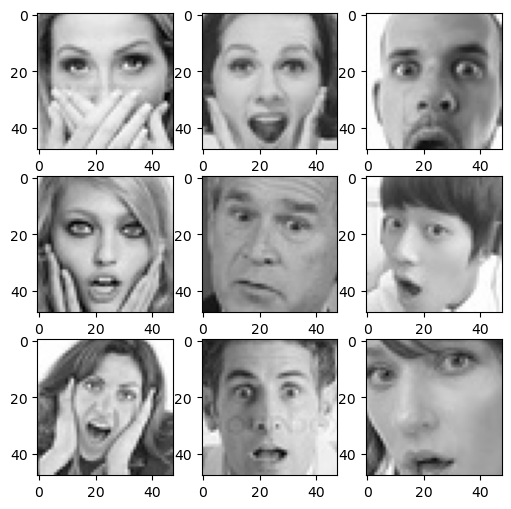

In [21]:
expression = 'surprise'
show_images(folder_path, expression)

**Observations and Insights:__**

## **Checking Distribution of Classes**

In [ ]:
expressions_train = list(os.listdir(folder_path + "train"))
print(expressions_train)

['neutral', 'happy', 'surprise', 'sad']


In [ ]:
expressions_test = list(os.listdir(folder_path + "test"))
print(expressions_train)

['neutral', 'happy', 'surprise', 'sad']


In [ ]:
def count_expression_data(folder_path, expressions):
    expression_count = {}
    for expression in expressions:
        expression_count[expression] = len(os.listdir(folder_path + expression))
    return expression_count

In [ ]:
expression_train_data = count_expression_data(folder_path + "train/", expressions_train)
print(expression_train_data)

{'neutral': 3978, 'happy': 3976, 'surprise': 3173, 'sad': 3982}


In [ ]:
expression_test_data = count_expression_data(folder_path + "test/", expressions_train)
print(expression_test_data)

{'neutral': 32, 'happy': 32, 'surprise': 32, 'sad': 32}


In [ ]:
expression_validation_data = count_expression_data(folder_path + "validation/", expressions_train)
print(expression_validation_data)

{'neutral': 1216, 'happy': 1825, 'surprise': 797, 'sad': 1139}


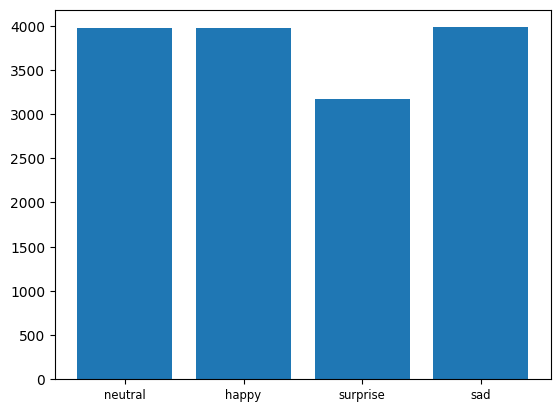

In [ ]:
df = pd.Series(expression_train_data)
plt.bar(range(len(df)), df.values, align = 'center')
plt.xticks(range(len(df)), df.index.values, size = 'small')
plt.show()

**Observations and Insights:**

Distribution of each class seems reasonable well distributed except for the surprise class. We can do few things to make the distribution equal to avoid any imbalance.


*   Resample from the surprise class i.e. augmentation

But for now, we will leave as it is.



**Think About It:**
* Are the classes equally distributed? If not, do you think the imbalance is too high? Will it be a problem as we progress?
* Are there any Exploratory Data Analysis tasks that we can do here? Would they provide any meaningful insights?

## **Creating our Data Loaders**

In this section, we are creating data loaders that we will use as inputs to our Neural Network.

**You have two options for the color_mode. You can set it to color_mode = 'rgb' or color_mode = 'grayscale'. You will need to try out both and see for yourself which one gives better performance.**

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

In [145]:
def get_data_set(folder_path, mode, batch_size, img_size):
    image_data = tf_utils.image_dataset_from_directory(folder_path,
                                       image_size = (img_size, img_size),
                                       color_mode = mode,
                                       batch_size = batch_size,
                                       label_mode = 'categorical',
                                       shuffle = True)

    return image_data

In [146]:
data_labels = ['happy', 'neutral', 'sad', 'surprise']

In [147]:
def show_image_data_set(image_data_set: tf.data.Dataset):
    total_count = 0
    for img_batch, label_batch in image_data_set:
        print(img_batch.shape)
        print(label_batch.shape)
        total_count += img_batch.shape[0]
    print("Total entry count: ", total_count)

In [148]:
def show_tf_dataset_image(image_data, encode_label=None):
    expressions = ['happy', 'neutral', 'sad', 'surprise']
    plt.figure(figsize = (4, 4))
    plt.imshow(image_data.numpy().astype("uint8"), cmap = "gray")
    plt.title(expressions[int(np.argmax(encode_label))])
    plt.show()

In [ ]:
training_data = get_data_set(folder_path + "train/", 'grayscale', 32, 48)
print(training_data)

Found 15109 files belonging to 4 classes.
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [ ]:
show_image_data_set(training_data)

In [ ]:
training_data.class_names

['happy', 'neutral', 'sad', 'surprise']

In [ ]:
validation_data = get_data_set(folder_path + "validation/", 'grayscale', 32, 48)

Found 4977 files belonging to 4 classes.


In [ ]:
validation_data.class_names

['happy', 'neutral', 'sad', 'surprise']

In [ ]:
testing_data = get_data_set(folder_path + "test/", 'grayscale', 32, 48)

Found 128 files belonging to 4 classes.


In [ ]:
print(testing_data)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>


In [ ]:
testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in testing_data:
    for label in label_batch:
        testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(testing_label_decoded)
testing_label_decoded.shape

[0 1 1 0 1 1 2 0 0 2 0 2 1 0 0 3 3 2 0 0 2 1 2 1 2 2 3 2 1 2 0 0 0 3 3 3 1
 1 1 2 2 0 1 3 3 1 2 1 2 2 1 3 1 2 3 3 2 0 3 3 2 1 3 3 0 3 2 0 0 3 0 2 3 1
 1 0 2 1 1 0 1 3 0 0 0 1 3 3 0 0 1 1 2 3 2 3 2 2 2 3 0 0 0 3 3 1 2 0 3 2 3
 0 1 1 2 2 1 3 1 3 0 1 3 2 0 2 1 3]


(128,)

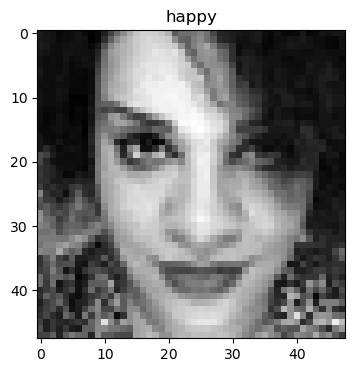

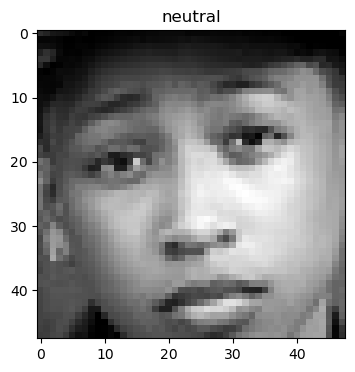

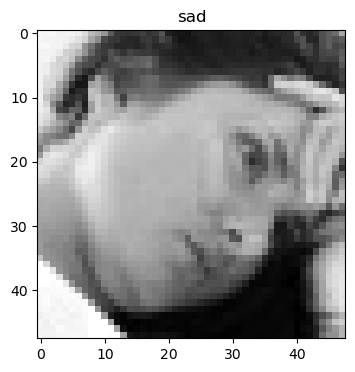

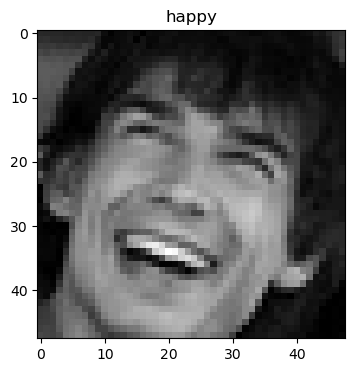

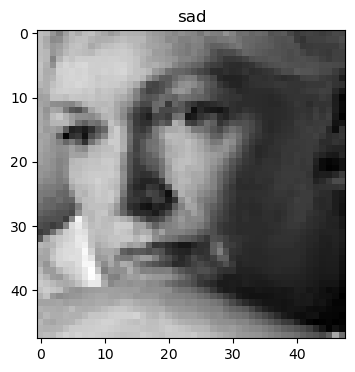

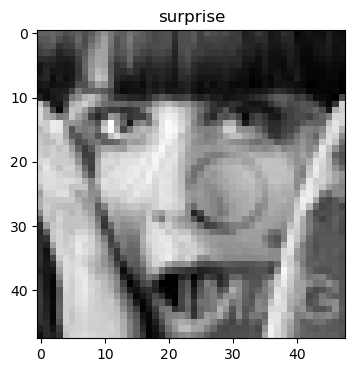

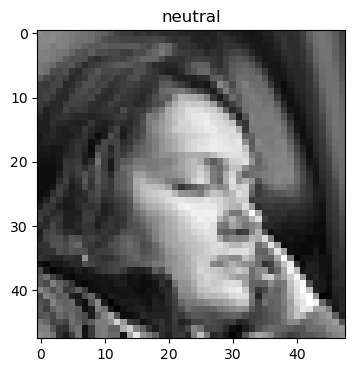

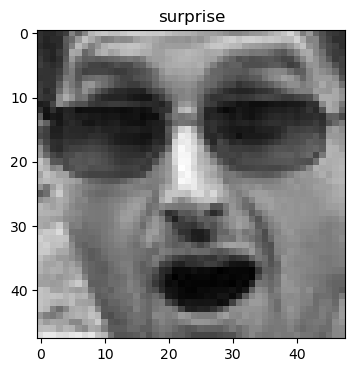

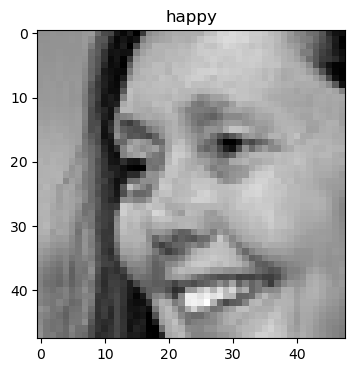

1


In [ ]:
ran_count = 0
for images, labels in training_data.take(1):
    for i in range(9):
        show_tf_dataset_image(images[i], labels[i])
    ran_count += 1
    break;

print(ran_count)

## **Model Building**

**Think About It:**
* Are Convolutional Neural Networks the right approach? Should we have gone with Artificial Neural Networks instead?
* What are the advantages of CNNs over ANNs and are they applicable here?

### **Creating the Base Neural Network**

In [ ]:
# Initializing a Sequential Model
model = Sequential()

# Add the first Convolutional block
model.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Add the second Convolutional block
model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Add the third Convolutional block
model.add(Conv2D(filters = 32, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))

# Add the Flatten layer
model.add(Flatten())

# Add the first Dense layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

# Add the Final layer
model.add(Dense(4, activation='softmax'))
model.summary()

c:\Users\amit_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 605,060 (2.31 MB)

 Trainable params: 605,060 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

### **Compiling and Training the Model**

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_file = os.path.abspath(out_directory + "/model_1_epoch_{epoch}max_accuracy.keras")
max_accuracy = ModelCheckpoint( model_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [ ]:
epochs = 20
history = model.fit(training_data, validation_data = validation_data, epochs = epochs, callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4375 - loss: 1.2408
Epoch 1: val_accuracy improved from -inf to 0.50171, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_1_epoch_1max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.4375 - loss: 1.2407 - val_accuracy: 0.5017 - val_loss: 1.1634 - learning_rate: 0.0010
Epoch 2/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4818 - loss: 1.1807
Epoch 2: val_accuracy improved from 0.50171 to 0.52763, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_1_epoch_2max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.4818 - loss: 1.1806 - val_accuracy: 0.5276 - val_loss: 1.1109 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5158 - loss: 1.1116
Epoch 3: val_accuracy improved from 0.52763 to 0.57685, saving model to D:\GitHub\amitprakash07\snowflake\

### **Evaluating the Model on the Test Set**

In [ ]:
accuracy = model.evaluate(testing_data, verbose=2)

4/4 - 0s - 89ms/step - accuracy: 0.6797 - loss: 0.7967


In [ ]:
model_predictions = model.predict(testing_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step 


In [ ]:
model_predictions.shape

(128, 4)

In [ ]:
model_predictions

array([[2.22477227e-01, 5.13243914e-01, 2.20075071e-01, 4.42038104e-02],
       [2.35002227e-02, 7.28567019e-02, 8.82589042e-01, 2.10540630e-02],
       [2.24717170e-01, 3.70370209e-01, 4.00655150e-01, 4.25753323e-03],
       [9.93248424e-04, 5.40472427e-03, 4.76109469e-03, 9.88840878e-01],
       [3.26299369e-01, 3.30387443e-01, 3.26998144e-01, 1.63150392e-02],
       [2.71358877e-01, 4.07825798e-01, 2.51606137e-01, 6.92092180e-02],
       [8.38884432e-03, 4.23927139e-03, 1.54910388e-03, 9.85822856e-01],
       [3.03047836e-01, 1.53407246e-01, 1.80792883e-01, 3.62751991e-01],
       [3.93171161e-02, 4.26224977e-01, 5.14655173e-01, 1.98026691e-02],
       [3.39748770e-01, 1.73726037e-01, 2.93399066e-01, 1.93126157e-01],
       [1.51405841e-01, 4.37805533e-01, 4.07215208e-01, 3.57337669e-03],
       [2.48065982e-02, 6.19524300e-01, 3.04129899e-01, 5.15391678e-02],
       [9.76110995e-01, 1.16151972e-02, 4.48830286e-03, 7.78553402e-03],
       [2.30413470e-02, 8.38086382e-03, 1.41947176e

In [ ]:
y_pred_arg=np.argmax(model_predictions,axis=1)

In [ ]:
y_pred_arg.shape

(128,)

In [ ]:
y_pred_arg

array([1, 2, 2, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0, 3, 1, 3, 2, 0, 1, 3, 2, 2,
       0, 2, 1, 0, 2, 0, 1, 3, 3, 0, 1, 2, 2, 3, 1, 2, 1, 1, 3, 1, 0, 2,
       2, 2, 1, 0, 0, 3, 3, 1, 0, 1, 1, 3, 2, 1, 2, 0, 2, 3, 2, 1, 2, 0,
       0, 2, 0, 1, 2, 3, 1, 1, 2, 3, 2, 1, 1, 3, 0, 3, 3, 2, 1, 2, 1, 1,
       0, 0, 0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 1, 0, 1, 1, 2, 3, 1, 0, 2,
       2, 0, 2, 2, 0, 1, 3, 0, 1, 0, 0, 3, 3, 1, 1, 3, 1, 0], dtype=int64)

In [ ]:
type(y_pred_arg)

numpy.ndarray

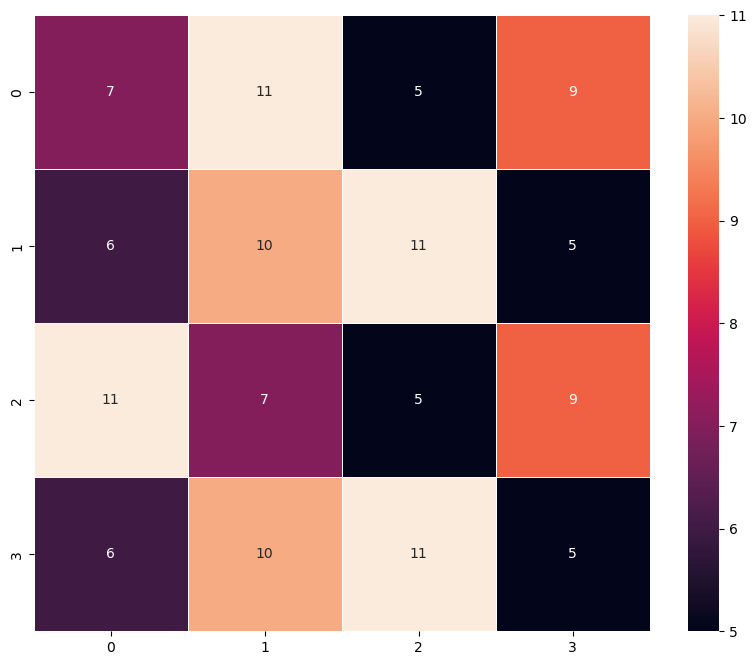

In [ ]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(testing_label_decoded,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

### **Creating the second Convolutional Neural Network**

- Try out a slightly larger architecture

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

In [ ]:
# Initializing a Sequential Model
model_2 = Sequential()

# Add the first Convolutional block
model_2.add(Conv2D(filters = 256, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 1), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Add the second Convolutional block
model_2.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Add the third Convolutional block
model_2.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2.add(BatchNormalization())
model_2.add(LeakyReLU(0.1))
model_2.add(MaxPooling2D(pool_size = (2, 2)))

# Add the fourth Convolutional block
model_2.add(Conv2D(filters = 32, kernel_size = (2, 2)))

# Add the Flatten layer
model_2.add(Flatten())

# Add the first Dense layer
model_2.add(Dense(512, activation='relu'))

# Dense layer
model_2.add(Dense(128, activation='relu'))

# Add the Final layer
model_2.add(Dense(4, activation='softmax'))
model_2.summary()

c:\Users\amit_\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 256)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 5, 5, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       410,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651,620 (2.49 MB)

 Trainable params: 650,724 (2.48 MB)

 Non-trainable params: 896 (3.50 KB)

### **Compiling and Training the Model**

In [ ]:
model_2.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_2_file = os.path.abspath(out_directory + "/model_2_epoch_{epoch}max_accuracy.keras")
max_accuracy = ModelCheckpoint( model_2_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [ ]:
epochs = 20
history = model_2.fit(training_data, validation_data = validation_data, epochs = epochs, callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.4700 - loss: 1.2365
Epoch 1: val_accuracy improved from -inf to 0.58328, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_epoch_1max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 256s 477ms/step - accuracy: 0.4702 - loss: 1.2361 - val_accuracy: 0.5833 - val_loss: 1.0044 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.6214 - loss: 0.8925
Epoch 2: val_accuracy did not improve from 0.58328
473/473 ━━━━━━━━━━━━━━━━━━━━ 189s 400ms/step - accuracy: 0.6214 - loss: 0.8924 - val_accuracy: 0.5590 - val_loss: 1.0303 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.6734 - loss: 0.7688
Epoch 3: val_accuracy improved from 0.58328 to 0.64436, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_epoch_3max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 193s 409ms/step - a

### **Evaluating the Model on the Test Set**

In [ ]:
accuracy = model_2.evaluate(testing_data, verbose=2)

4/4 - 0s - 97ms/step - accuracy: 0.6094 - loss: 0.8819


In [ ]:
model_predictions = model_2.predict(testing_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


In [ ]:
y_pred_arg=np.argmax(model_predictions, axis=1)

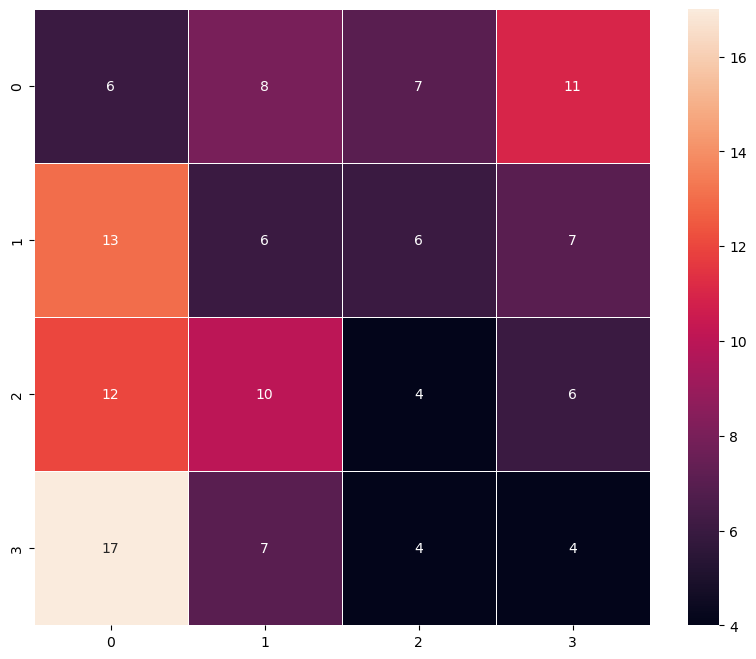

In [ ]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(testing_label_decoded,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# Same model with RGB

In [ ]:
tf.keras.backend.clear_session()

np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

In [ ]:
## Gather RGB dataset
rgb_training_data = get_data_set(folder_path + "train/", 'rgb', 32, 48)
rgb_test_data = get_data_set(folder_path + "test/", 'rgb', 32, 48)
rgb_validation_data = get_data_set(folder_path + "validation/", 'rgb', 32, 48)

Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.


In [ ]:
rgb_testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in rgb_test_data:
    for label in label_batch:
        rgb_testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(rgb_testing_label_decoded)
rgb_testing_label_decoded.shape

[3 0 2 1 0 2 3 3 0 3 0 3 2 0 3 1 3 0 3 2 3 1 0 2 0 0 3 2 0 2 3 3 2 1 0 3 2
 0 0 2 2 1 1 0 0 1 0 1 0 1 2 1 3 1 3 3 1 0 3 1 3 1 1 1 3 0 2 2 1 2 2 3 1 1
 2 1 3 1 2 0 0 3 3 3 0 2 0 1 1 0 0 2 2 2 1 1 2 3 2 2 1 0 0 0 1 0 3 3 0 1 1
 3 3 2 2 2 2 2 3 1 0 3 0 1 2 1 2 3]


(128,)

In [ ]:
show_image_data_set(rgb_training_data)

(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)
(32, 4)
(32, 48, 48, 3)


In [ ]:
# Initializing a Sequential Model
model_2_with_rgb = Sequential()

# Add the first Convolutional block
model_2_with_rgb.add(tf.keras.layers.Rescaling(1./255, input_shape = (48, 48, 3)))
model_2_with_rgb.add(Conv2D(filters = 256, kernel_size = (2, 2), padding = "same", input_shape = (48, 48, 3), activation='relu'))
model_2_with_rgb.add(BatchNormalization())
model_2_with_rgb.add(LeakyReLU(0.1))
model_2_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))

# Add the second Convolutional block
model_2_with_rgb.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2_with_rgb.add(BatchNormalization())
model_2_with_rgb.add(LeakyReLU(0.1))
model_2_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))

# Add the third Convolutional block
model_2_with_rgb.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", activation='relu'))
model_2_with_rgb.add(BatchNormalization())
model_2_with_rgb.add(LeakyReLU(0.1))
model_2_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))

# Add the fourth Convolutional block
model_2_with_rgb.add(Conv2D(filters = 32, kernel_size = (2, 2)))

# Add the Flatten layer
model_2_with_rgb.add(Flatten())

# Add the first Dense layer
model_2_with_rgb.add(Dense(512, activation='relu'))

# Dense layer
model_2_with_rgb.add(Dense(128, activation='relu'))

# Add the Final layer
model_2_with_rgb.add(Dense(4, activation='softmax'))
model_2_with_rgb.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 48, 48, 256)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 48, 48, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       410,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 653,668 (2.49 MB)

 Trainable params: 652,772 (2.49 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model_2_with_rgb.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
model_2_rgb_file = os.path.abspath(out_directory + "/model_2_rgb_epoch_{epoch}_max_accuracy.keras")
max_accuracy = ModelCheckpoint( model_2_rgb_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [ ]:
epochs = 20
history = model_2_with_rgb.fit(rgb_training_data, validation_data = rgb_validation_data, epochs = epochs, callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.4688 - loss: 1.2450
Epoch 1: val_accuracy improved from -inf to 0.45489, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_rgb_epoch_1_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 209s 399ms/step - accuracy: 0.4690 - loss: 1.2446 - val_accuracy: 0.4549 - val_loss: 1.1779 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6222 - loss: 0.8977
Epoch 2: val_accuracy improved from 0.45489 to 0.58951, saving model to D:\GitHub\amitprakash07\snowflake\temp\sandbox\Facial_emotion_images\model_2_rgb_epoch_2_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 183s 386ms/step - accuracy: 0.6222 - loss: 0.8977 - val_accuracy: 0.5895 - val_loss: 0.9666 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6759 - loss: 0.7650
Epoch 3: val_accuracy improved from 0.58951 to 0.62327, saving model to D:\GitHub\amitpra

## Model Evaluation with RGB data

In [ ]:
accuracy = model_2_with_rgb.evaluate(rgb_test_data, verbose=2)

4/4 - 0s - 88ms/step - accuracy: 0.6094 - loss: 0.8706


In [ ]:
model_predictions = model_2_with_rgb.predict(rgb_test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step


In [ ]:
y_pred_arg=np.argmax(model_predictions, axis=1)

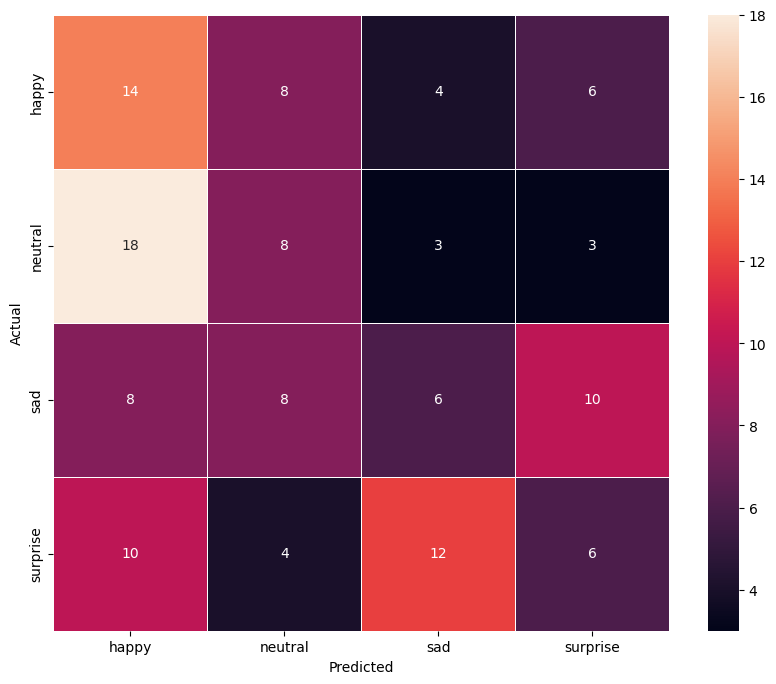

In [ ]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(rgb_testing_label_decoded,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=data_labels,
    yticklabels=data_labels
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Think About It:**

* Did the models have a satisfactory performance? If not, then what are the possible reasons?
* Which Color mode showed better overall performance? What are the possible reasons? Do you think having 'rgb' color mode is needed because the images are already black and white?

## **Transfer Learning Architectures**

In this section, we will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we need to create new DataLoaders.

### **Creating our Data Loaders for Transfer Learning Architectures**

In this section, we are creating data loaders that we will use as inputs to our Neural Network. We will have to go with color_mode = 'rgb' as this is the required format for the transfer learning architectures.

In [ ]:
## Transfer learning (tl) data sets
tl_training_data = get_data_set(folder_path + "train/", 'rgb', 32, 48)
tl_test_data = get_data_set(folder_path + "test/", 'rgb', 32, 48)
tl_validation_data = get_data_set(folder_path + "validation/", 'rgb', 32, 48)

Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.


In [ ]:
tl_testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in tl_test_data:
    for label in label_batch:
        tl_testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(tl_testing_label_decoded)
tl_testing_label_decoded.shape

[0 0 2 3 3 1 3 0 2 2 1 3 1 1 1 0 1 2 3 3 3 2 0 0 1 1 1 1 3 0 3 3 1 2 0 3 2
 2 1 1 2 2 2 1 1 2 1 2 0 0 3 0 1 2 0 3 0 0 0 0 0 0 1 0 2 1 3 1 3 1 0 3 3 2
 1 3 2 2 1 2 2 3 2 3 0 1 0 1 3 0 1 0 2 2 3 3 2 3 1 2 2 2 3 1 2 3 0 3 0 3 2
 1 1 0 0 3 3 0 2 0 3 2 2 1 0 1 3 0]


(128,)

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 48, 48, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 3, 3, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

### **Model Building**

- Import VGG16 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

x = Flatten()(transfer_layer.output)

x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

vgg_transfer_model = Model(vgg.input, pred)

### **Compiling and Training the VGG16 Model**

In [ ]:
vgg_transfer_model.compile(optimizer = Adam(learning_rate = 0.001),
                           loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
vgg_transfer_model_file = os.path.abspath(out_directory + "/vgg_transfer_model{epoch}_max_accuracy.keras")
checkpoint = ModelCheckpoint(vgg_transfer_model_file,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True,
                          start_from_epoch = 3)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [ ]:
epochs = 20
vgg_model_history = vgg_transfer_model.fit(tl_training_data,
                                         validation_data = tl_validation_data,
                                         epochs = epochs,
                                         callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3983 - loss: 1.3781
Epoch 1: val_loss improved from -inf to 1.13289, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/vgg_transfer_model1_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.3984 - loss: 1.3778 - val_accuracy: 0.4999 - val_loss: 1.1329 - learning_rate: 0.0010
Epoch 2/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5125 - loss: 1.1186
Epoch 2: val_loss improved from 1.13289 to 1.21824, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/vgg_transfer_model2_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5126 - loss: 1.1186 - val_accuracy: 0.4770 - val_loss: 1.2182 - learning_rate: 0.0010
Epoch 3/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5416 - loss: 1.0702
Epoch 3: val_loss did not improve from 1.21824
473/473 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5416 - loss: 1.0702 

### **Evaluating the VGG16 model**

In [ ]:
vgg_accuracy = vgg_transfer_model.evaluate(tl_test_data, verbose=2)

4/4 - 0s - 22ms/step - accuracy: 0.5156 - loss: 1.1496


In [ ]:
vgg_model_predictions = vgg_transfer_model.predict(tl_test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step 


In [ ]:
vgg_y_pred_arg=np.argmax(vgg_model_predictions, axis=1)

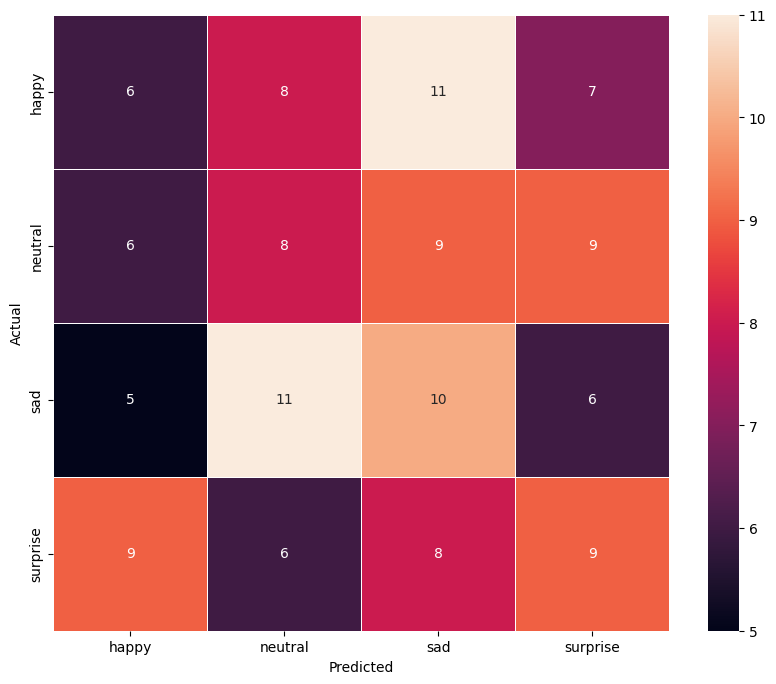

In [ ]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(tl_testing_label_decoded,vgg_y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=data_labels,
    yticklabels=data_labels
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Think About It:**

- What do you infer from the general trend in the training performance?
- Is the training accuracy consistently improving?
- Is the validation accuracy also improving similarly?

**Observations and Insights:**

Accuracy went down in comparison to model without transfer learning.

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance**

## **ResNet V2 Model**

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
Resnet = tf.keras.applications.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

Model: "resnet101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 12, 12, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 12, 12, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 42,658,176 (162.73 MB)

 Trainable params: 42,552,832 (162.33 MB)

 Non-trainable params: 105,344 (411.50 KB)

### **Model Building**

- Import Resnet v2 upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

In [ ]:
x = Flatten()(transfer_layer_Resnet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

resnet_transfer_model = Model(Resnet.input, pred)

### **Compiling and Training the Model**

In [ ]:
resnet_transfer_model.compile(optimizer = Adam(learning_rate = 0.001),
                           loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
resnet_transfer_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 54, 54, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 24, 24, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 24, 24, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 24, 24, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 26, 26, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 12, 12, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 12, 12, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 12, 12, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 12, 12, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 12, 12, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 12, 12, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 12, 12, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 44,797,252 (170.89 MB)

 Trainable params: 2,138,948 (8.16 MB)

 Non-trainable params: 42,658,304 (162.73 MB)

In [ ]:
resnet_transfer_model_file = os.path.abspath(out_directory + "/resnet_transfer_model{epoch}_max_accuracy.keras")
checkpoint = ModelCheckpoint(resnet_transfer_model_file,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [ ]:
epochs = 20
resnet_transfer_model_history = resnet_transfer_model.fit(tl_training_data,
                                         validation_data = tl_validation_data,
                                         epochs = epochs,
                                         callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3599 - loss: 1.4108
Epoch 1: val_loss improved from -inf to 1.27505, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/resnet_transfer_model1_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 51s 64ms/step - accuracy: 0.3601 - loss: 1.4105 - val_accuracy: 0.4561 - val_loss: 1.2751 - learning_rate: 0.0010
Epoch 2/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5122 - loss: 1.1164
Epoch 2: val_loss did not improve from 1.27505
473/473 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.5123 - loss: 1.1164 - val_accuracy: 0.5493 - val_loss: 1.0845 - learning_rate: 0.0010
Epoch 3/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5388 - loss: 1.0713
Epoch 3: val_loss did not improve from 1.27505
473/473 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.5388 - loss: 1.0714 - val_accuracy: 0.5670 - val_loss: 1.0444 - learning_rate: 0.0010
Epoch 4/20
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/s

### **Evaluating the ResNet Model**

In [ ]:
resnet_transfer_accuracy = resnet_transfer_model.evaluate(tl_test_data, verbose=2)

4/4 - 0s - 39ms/step - accuracy: 0.5391 - loss: 0.9812


In [ ]:
resnet_transfer_model_predictions = resnet_transfer_model.predict(tl_test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step


In [ ]:
resnet_transfer_y_pred_arg=np.argmax(resnet_transfer_model_predictions, axis=1)

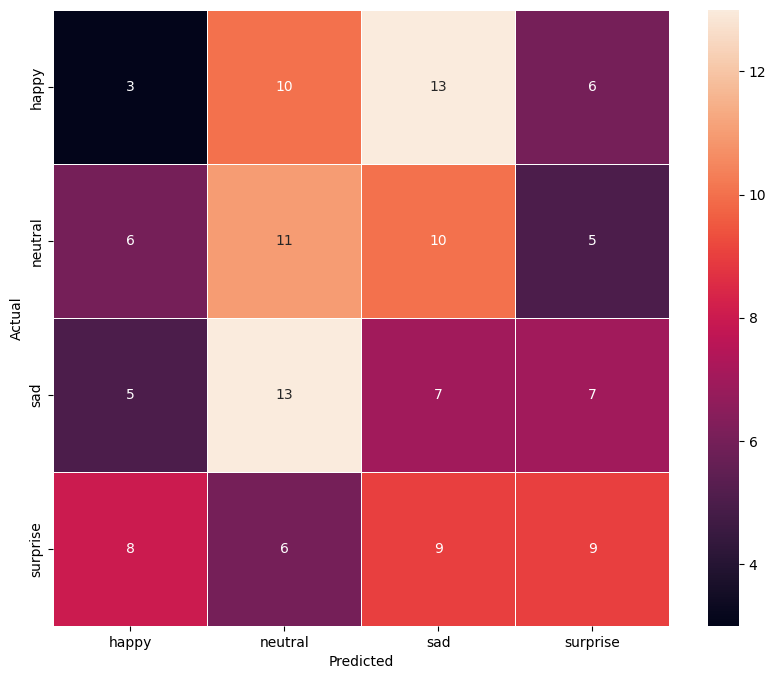

In [ ]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(tl_testing_label_decoded, resnet_transfer_y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=data_labels,
    yticklabels=data_labels
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the ResNet Transfer layer and see if you can improve the performance.**

## **EfficientNet Model**

In [ ]:
tf.keras.backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
EfficientNet = tf.keras.applications.EfficientNetV2B2(include_top=False, weights="imagenet", input_shape= (48, 48, 3))
EfficientNet.summary()

Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 48, 48, 3)      │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 48, 48, 3)      │              0 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 24, 24, 32)     │            864 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 24, 24, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 24, 24, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, 24, 24, 16)     │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, 24, 24, 16)     │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, 24, 24, 16)     │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_conv      │ (None, 24, 24, 16)     │          2,304 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_bn        │ (None, 24, 24, 16)     │             64 │ block1b_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_project_activati… │ (None, 24, 24, 16)     │              0 │ block1b_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_drop (Dropout)    │ (None, 24, 24, 16)     │              0 │ block1b_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1b_add (Add)         │ (None, 24, 24, 16)     │              0 │ block1b_drop[0][0],    │
│                           │                        │                │ block1a_project_activ… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv  

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 8,687,086 (33.14 MB)

 Non-trainable params: 82,288 (321.44 KB)

### **Model Building**

- Import EfficientNet upto the layer of your choice and add Fully Connected layers on top of it.

In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

In [ ]:
x = Flatten()(transfer_layer_EfficientNet.output)
x = Dense(256, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)
pred = Dense(4, activation='softmax')(x)

efficientNet_transfer_model = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [ ]:
efficientNet_transfer_model.compile(optimizer = Adam(learning_rate = 0.001),
                           loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
efficientNet_transfer_model_file = os.path.abspath(out_directory + "/efficientNet_transfer_model{epoch}_max_accuracy.keras")
checkpoint = ModelCheckpoint(efficientNet_transfer_model_file,
                             monitor = 'val_loss',
                             verbose = 1,
                             save_best_only = True,
                             mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

In [ ]:
epochs = 20
efficientNet_transfer_model_history = efficientNet_transfer_model.fit(tl_training_data,
                                         validation_data = tl_validation_data,
                                         epochs = epochs,
                                         callbacks = callbacks_list)

Epoch 1/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3550 - loss: 1.4084
Epoch 1: val_loss improved from -inf to 1.30419, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/efficientNet_transfer_model1_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 54s 59ms/step - accuracy: 0.3552 - loss: 1.4081 - val_accuracy: 0.4113 - val_loss: 1.3042 - learning_rate: 0.0010
Epoch 2/20
469/473 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5283 - loss: 1.0826
Epoch 2: val_loss did not improve from 1.30419
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5285 - loss: 1.0824 - val_accuracy: 0.5168 - val_loss: 1.1076 - learning_rate: 0.0010
Epoch 3/20
471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5727 - loss: 0.9944
Epoch 3: val_loss did not improve from 1.30419
473/473 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5727 - loss: 0.9944 - val_accuracy: 0.5264 - val_loss: 1.1611 - learning_rate: 0.0010
Epoch 4/20
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/

### **Evaluating the EfficientnetNet Model**

In [ ]:
efficientNet_transfer_accuracy = efficientNet_transfer_model.evaluate(tl_test_data, verbose=2)

4/4 - 0s - 16ms/step - accuracy: 0.6328 - loss: 0.8497


In [ ]:
efficientNet_transfer_model_predictions = efficientNet_transfer_model.predict(tl_test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


In [ ]:
efficientNet_transfer_y_pred_arg=np.argmax(efficientNet_transfer_model_predictions, axis=1)

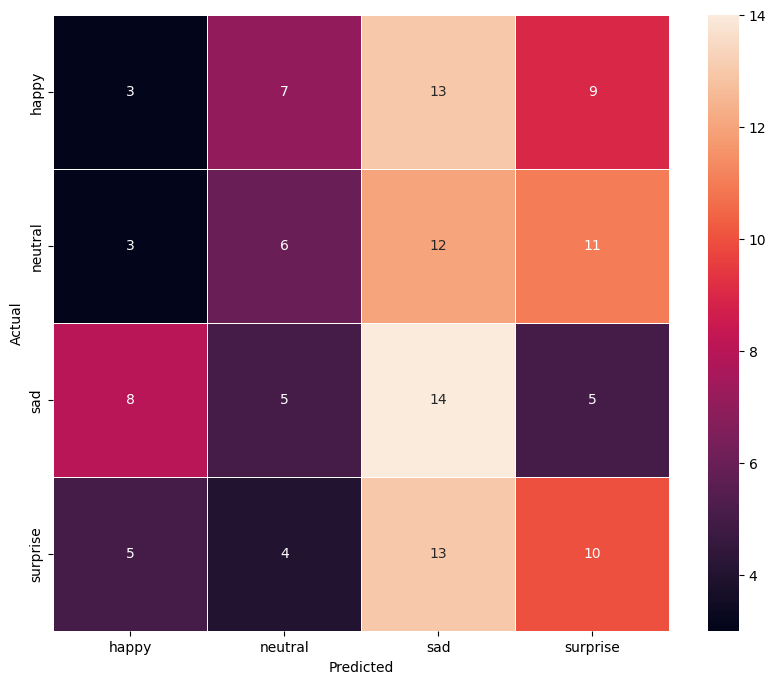

In [ ]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix_out = tf_math.confusion_matrix(tl_testing_label_decoded, efficientNet_transfer_y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=data_labels,
    yticklabels=data_labels
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:__**

**Note: You can even go back and build your own architecture on top of the VGG16 Transfer layer and see if you can improve the performance.**

**Think About It:**

* What is your overall performance of these Transfer Learning Architectures? Can we draw a comparison of these models' performances. Are we satisfied with the accuracies that we have received?
* Do you think our issue lies with 'rgb' color_mode?

Now that we have tried multiple pre-trained models, let's build a complex CNN architecture and see if we can get better performance.

# **Building a Complex Neural Network Architecture**

In this section, we will build a more complex Convolutional Neural Network Model that has close to as many parameters as we had in our Transfer Learning Models. However, we will have only 1 input channel for our input images.

## Build Model with RGB input data

### **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [ ]:
## Transfer learning (tl) data sets
complex_training_data = get_data_set(folder_path + "train/", 'rgb', 32, 48)
complex_test_data = get_data_set(folder_path + "test/", 'rgb', 32, 48)
complex_validation_data = get_data_set(folder_path + "validation/", 'rgb', 32, 48)

Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.


In [ ]:
complex_testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in complex_test_data:
    for label in label_batch:
        complex_testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(complex_testing_label_decoded)
complex_testing_label_decoded.shape

[3 0 2 1 0 2 3 3 0 3 0 3 2 0 3 1 3 0 3 2 3 1 0 2 0 0 3 2 0 2 3 3 2 1 0 3 2
 0 0 2 2 1 1 0 0 1 0 1 0 1 2 1 3 1 3 3 1 0 3 1 3 1 1 1 3 0 2 2 1 2 2 3 1 1
 2 1 3 1 2 0 0 3 3 3 0 2 0 1 1 0 0 2 2 2 1 1 2 3 2 2 1 0 0 0 1 0 3 3 0 1 1
 3 3 2 2 2 2 2 3 1 0 3 0 1 2 1 2 3]


(128,)

In [ ]:
tf.keras.backend.clear_session()

np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [ ]:
# Initializing a Sequential Model
cmp_model_with_rgb = Sequential()

# Rescaling/Normalization
cmp_model_with_rgb.add(tf.keras.layers.Rescaling(1./255, input_shape = (48, 48, 3)))

# CNN_1
cmp_model_with_rgb.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", activation='relu'))
cmp_model_with_rgb.add(BatchNormalization())
cmp_model_with_rgb.add(LeakyReLU(0.1))
cmp_model_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))
cmp_model_with_rgb.add(Dropout(0.2))

# CNN_2
cmp_model_with_rgb.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation='relu'))
cmp_model_with_rgb.add(BatchNormalization())
cmp_model_with_rgb.add(LeakyReLU(0.1))
cmp_model_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))
cmp_model_with_rgb.add(Dropout(0.2))

# CNN_3
cmp_model_with_rgb.add(Conv2D(filters = 512, kernel_size = (2, 2), padding = "same", activation='relu'))
cmp_model_with_rgb.add(BatchNormalization())
cmp_model_with_rgb.add(LeakyReLU(0.1))
cmp_model_with_rgb.add(MaxPooling2D(pool_size = (2, 2)))
cmp_model_with_rgb.add(Dropout(0.2))

# CNN_4
cmp_model_with_rgb.add(Conv2D(filters = 512, kernel_size = (2, 2)))

# CNN_5
cmp_model_with_rgb.add(Conv2D(filters = 128, kernel_size = (2, 2)))

# Add the Flatten layer
cmp_model_with_rgb.add(Flatten())

# Add the first Dense layer
cmp_model_with_rgb.add(Dense(256))
cmp_model_with_rgb.add(BatchNormalization())
cmp_model_with_rgb.add(tf.keras.layers.ReLU())
cmp_model_with_rgb.add(Dropout(0.2))

# Dense layer
cmp_model_with_rgb.add(Dense(512))
cmp_model_with_rgb.add(BatchNormalization())
cmp_model_with_rgb.add(tf.keras.layers.ReLU())
cmp_model_with_rgb.add(Dropout(0.2))

# Add the Final layer
cmp_model_with_rgb.add(Dense(4, activation='softmax'))
cmp_model_with_rgb.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 5, 5, 512)           │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,5

 Total params: 2,271,812 (8.67 MB)

 Trainable params: 2,268,868 (8.66 MB)

 Non-trainable params: 2,944 (11.50 KB)

### **Compiling and Training the Model**

In [ ]:
cmp_model_with_rgb.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
cmp_model_with_rgb_file = os.path.abspath(out_directory + "/cmp_model_with_rgb_epoch_{epoch}_max_accuracy.keras")
max_accuracy = ModelCheckpoint( cmp_model_with_rgb_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True,
                                start_from_epoch = 6)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [ ]:
cmp_model_with_rgb_history = cmp_model_with_rgb.fit(complex_training_data,
                                                    validation_data = complex_validation_data,
                                                    epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4182 - loss: 1.3501
Epoch 1: val_accuracy improved from -inf to 0.38115, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/cmp_model_with_rgb_epoch_1_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4184 - loss: 1.3498 - val_accuracy: 0.3812 - val_loss: 1.2870 - learning_rate: 0.0010
Epoch 2/30
471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5821 - loss: 0.9764
Epoch 2: val_accuracy improved from 0.38115 to 0.57384, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/cmp_model_with_rgb_epoch_2_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5822 - loss: 0.9763 - val_accuracy: 0.5738 - val_loss: 0.9640 - learning_rate: 0.0010
Epoch 3/30
470/473 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6313 - loss: 0.8856
Epoch 3: val_accuracy improved from 0.57384 to 0.62146, saving model to /content/drive/MyDrive/mit/pr

### **Evaluating the Model on Test Set**

In [ ]:
comp_model_accuracy = cmp_model_with_rgb.evaluate(complex_test_data, verbose=2)

4/4 - 0s - 9ms/step - accuracy: 0.6953 - loss: 0.6952


In [ ]:
comp_model_predictions = cmp_model_with_rgb.predict(complex_test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step  


In [ ]:
comp_model_y_pred_arg=np.argmax(comp_model_predictions, axis=1)

In [ ]:
comp_model_y_pred_arg

array([1, 3, 0, 0, 1, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 3, 3, 3, 3, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 3, 1, 0, 0, 3, 0, 3, 3, 0, 0, 1, 2, 3, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 3, 2, 1, 3, 3, 1, 3, 1, 0, 2, 3,
       0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 3, 1, 0, 0, 3, 1, 1,
       0, 3, 3, 2, 1, 1, 2, 3, 0, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 3,
       0, 2, 2, 3, 3, 3, 1, 0, 1, 3, 1, 0, 1, 3, 1, 2, 2, 1])

### **Confusion Matrix of the model**

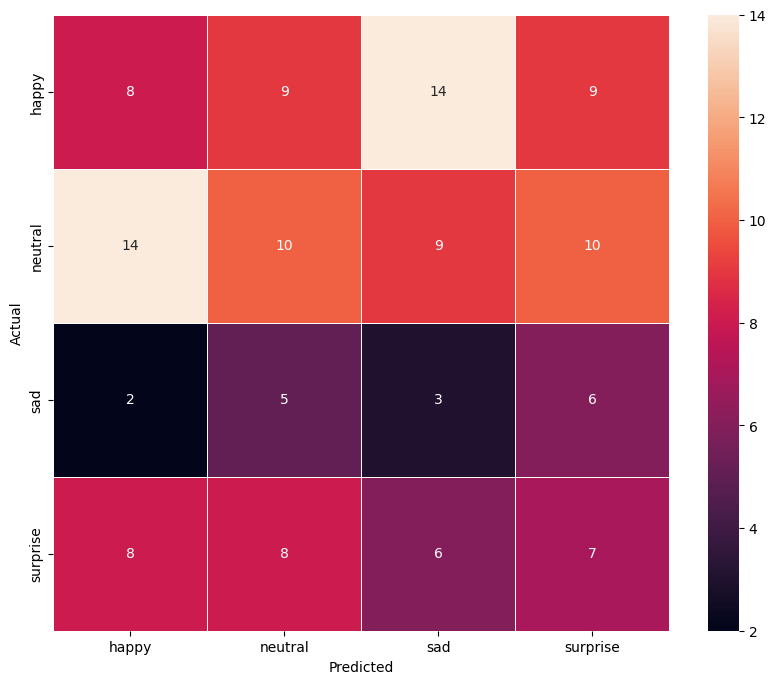

In [ ]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
complex_model_confusion_matrix_out = tf_math.confusion_matrix(comp_model_y_pred_arg, complex_testing_label_decoded)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    complex_model_confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=data_labels,
    yticklabels=data_labels
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Build the model with grayscale image

### **Creating our Data Loaders**

In this section, we are creating data loaders which we will use as inputs to the more Complicated Convolutional Neural Network. We will go ahead with color_mode = 'grayscale'.

In [149]:
## Transfer learning (tl) data sets
cmp_grayscale_training_data = get_data_set(folder_path + "train/", 'grayscale', 32, 48)
cmp_grayscale_test_data = get_data_set(folder_path + "test/", 'grayscale', 32, 48)
cmp_grayscale_validation_data = get_data_set(folder_path + "validation/", 'grayscale', 32, 48)

Found 15109 files belonging to 4 classes.
Found 128 files belonging to 4 classes.
Found 4977 files belonging to 4 classes.


In [150]:
cmp_grayscale_testing_label_decoded = np.zeros((128,), dtype='int32')
iter = 0
for image_batch, label_batch in cmp_grayscale_test_data:
    for label in label_batch:
        cmp_grayscale_testing_label_decoded[iter] = np.argmax(label)
        iter += 1

print(complex_testing_label_decoded)
complex_testing_label_decoded.shape

[3 1 3 2 3 3 3 1 1 0 1 3 1 1 0 0 1 2 3 0 3 2 3 3 3 2 2 3 3 1 1 3 3 2 3 0 2
 1 3 2 3 1 0 0 3 0 0 2 0 1 1 3 2 3 1 2 2 2 1 0 0 2 0 2 0 1 3 0 0 1 3 2 0 1
 2 0 2 3 2 3 0 2 3 2 3 2 0 2 0 1 3 2 1 1 1 0 2 3 3 2 2 1 2 1 1 0 0 1 0 2 1
 0 2 0 0 3 0 1 1 1 1 2 0 0 3 2 0 1]


(128,)

In [156]:
tf.keras.backend.clear_session()

np.random.seed(42)
import random
random.seed(20)
tf.random.set_seed(20)

### **Model Building**

- Try building a layer with 5 Convolutional Blocks and see if performance increases.

In [157]:
# Initializing a Sequential Model
cmp_grayscale_model = Sequential()

# Rescaling/Normalization
cmp_grayscale_model.add(tf.keras.layers.Rescaling(1./255, input_shape = (48, 48, 1)))

# CNN_1
cmp_grayscale_model.add(Conv2D(filters = 64, kernel_size = (2, 2), padding = "same", activation='relu'))
cmp_grayscale_model.add(BatchNormalization())
cmp_grayscale_model.add(LeakyReLU(0.1))
cmp_grayscale_model.add(MaxPooling2D(pool_size = (2, 2)))
cmp_grayscale_model.add(Dropout(0.2))

# CNN_2
cmp_grayscale_model.add(Conv2D(filters = 128, kernel_size = (2, 2), padding = "same", activation='relu'))
cmp_grayscale_model.add(BatchNormalization())
cmp_grayscale_model.add(LeakyReLU(0.1))
cmp_grayscale_model.add(MaxPooling2D(pool_size = (2, 2)))
cmp_grayscale_model.add(Dropout(0.2))

# CNN_3
cmp_grayscale_model.add(Conv2D(filters = 512, kernel_size = (2, 2), padding = "same", activation='relu'))
cmp_grayscale_model.add(BatchNormalization())
cmp_grayscale_model.add(LeakyReLU(0.1))
cmp_grayscale_model.add(MaxPooling2D(pool_size = (2, 2)))
cmp_grayscale_model.add(Dropout(0.2))

# CNN_4
cmp_grayscale_model.add(Conv2D(filters = 512, kernel_size = (2, 2)))

# CNN_5
cmp_grayscale_model.add(Conv2D(filters = 128, kernel_size = (2, 2)))

# Add the Flatten layer
cmp_grayscale_model.add(Flatten())

# Add the first Dense layer
cmp_grayscale_model.add(Dense(256))
cmp_grayscale_model.add(BatchNormalization())
cmp_grayscale_model.add(tf.keras.layers.ReLU())
cmp_grayscale_model.add(Dropout(0.2))

# Dense layer
cmp_grayscale_model.add(Dense(512))
cmp_grayscale_model.add(BatchNormalization())
cmp_grayscale_model.add(tf.keras.layers.ReLU())
cmp_grayscale_model.add(Dropout(0.2))

# Add the Final layer
cmp_grayscale_model.add(Dense(4, activation='softmax'))
cmp_grayscale_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 512)         │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 5, 5, 512)           │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,5

 Total params: 2,271,300 (8.66 MB)

 Trainable params: 2,268,356 (8.65 MB)

 Non-trainable params: 2,944 (11.50 KB)

### **Compiling and Training the Model**

In [158]:
cmp_grayscale_model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [159]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
cmp_grayscale_model_file = os.path.abspath(out_directory + "/cmp_grayscale_model_epoch_{epoch}_max_accuracy.keras")
max_accuracy = ModelCheckpoint( cmp_grayscale_model_file,
                                monitor='val_accuracy',
                                verbose=1,
                                save_best_only=True,
                                mode='max')

early_stopping = EarlyStopping( monitor = 'val_loss',
                                min_delta = 0,
                                patience = 3,
                                verbose = 1,
                                restore_best_weights = True,
                                start_from_epoch = 6)

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                                        factor = 0.2,
                                        patience = 3,
                                        verbose = 1,
                                        min_delta = 0.0001)

callbacks_list = [early_stopping, max_accuracy, reduce_learningrate]

In [160]:
cmp_grayscale_model_history = cmp_grayscale_model.fit(cmp_grayscale_training_data,
                                                    validation_data = cmp_grayscale_validation_data,
                                                    epochs = 30, callbacks = callbacks_list)

Epoch 1/30
473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4221 - loss: 1.3526
Epoch 1: val_accuracy improved from -inf to 0.31465, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/cmp_grayscale_model_epoch_1_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.4222 - loss: 1.3523 - val_accuracy: 0.3146 - val_loss: 1.4774 - learning_rate: 0.0010
Epoch 2/30
471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5752 - loss: 0.9871
Epoch 2: val_accuracy improved from 0.31465 to 0.63291, saving model to /content/drive/MyDrive/mit/projects/elective/facial_emotion/cmp_grayscale_model_epoch_2_max_accuracy.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5753 - loss: 0.9869 - val_accuracy: 0.6329 - val_loss: 0.8862 - learning_rate: 0.0010
Epoch 3/30
471/473 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6297 - loss: 0.8772
Epoch 3: val_accuracy improved from 0.63291 to 0.65963, saving model to /content/drive/MyDrive/mit/

### **Evaluating the Model on Test Set**

In [161]:
cmp_grayscale_model_accuracy = cmp_grayscale_model.evaluate(cmp_grayscale_test_data, verbose=2)

4/4 - 0s - 9ms/step - accuracy: 0.7344 - loss: 0.6197


In [163]:
cmp_grayscale_model_predictions = cmp_grayscale_model.predict(cmp_grayscale_test_data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


In [164]:
cmp_grayscale_model_y_pred_arg=np.argmax(cmp_grayscale_model_predictions, axis=1)

In [165]:
cmp_grayscale_model_y_pred_arg

array([2, 3, 0, 1, 1, 0, 0, 3, 0, 0, 1, 2, 0, 0, 0, 2, 3, 3, 3, 1, 2, 2,
       0, 0, 1, 2, 2, 1, 1, 2, 3, 2, 0, 0, 3, 1, 3, 3, 0, 0, 1, 2, 3, 1,
       2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 3, 2, 1, 3, 3, 1, 3, 1, 0, 2, 3,
       0, 1, 3, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 2, 1, 3, 2, 0, 3, 3, 1, 1,
       0, 3, 3, 1, 2, 1, 2, 3, 0, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2, 2, 0, 3,
       0, 2, 2, 1, 3, 3, 1, 0, 1, 1, 2, 2, 1, 3, 1, 2, 2, 1])

**Observations and Insights:**

Model has, comparatively better performance on accuracy.

### **Plotting the Confusion Matrix for the chosen final model**

**Comparison of various models**

| Model Variable | Input | Training_Accuracy | Training_Loss | Epoch(best/total) | Learning_Rate |Evaluation_accuracy | Evaluation_loss |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
model|grayscale|0.6614|0.8454|14/20|0.0010|0.6797|0.7967|
model_2|grayscale|0.6444|0.8535|3/20|0.0010|0.6094|0.8819
model_2_with_rgb|rgb|0.6233|0.9151|3/20|0.0010|0.6094|0.8706
vgg_transfer_model|rgb|0.5437|1.0852|4/20|0.0010|0.5156|1.1496
resnet_transfer_model|rgb|0.5388|1.0713|3/20|0.0010|0.5391|0.9812
efficientNet_transfer_model|rgb|0.6241|0.9085|7/20|0.0010|0.6328|0.8497
cmp_model_with_rgb|rgb|0.6950|0.7464|7/20|0.0010|0.6953|0.6952|
**cmp_grayscale_model**|**grayscale**|**0.7400**|**0.6616**|**2.0000e-0**|**10/30**|**0.7344**|**0.6197**


### Final model confusion matrix

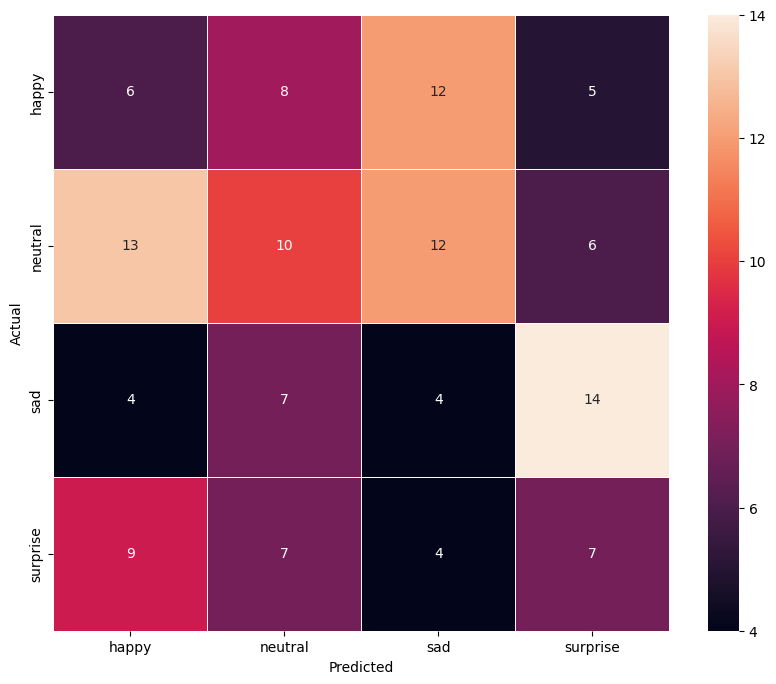

In [166]:
import tensorflow.math as tf_math

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
cmp_grayscale_model_confusion_matrix_out = tf_math.confusion_matrix(cmp_grayscale_model_y_pred_arg, cmp_grayscale_testing_label_decoded)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    cmp_grayscale_model_confusion_matrix_out,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax,
    xticklabels=data_labels,
    yticklabels=data_labels
)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### **Proposal for the final solution design**:
Choosen Model: Model with 5 CNNs has comparatively better accuracy, and least loss among all the current models.

ModelName:cmp_grayscale_model <br>
Input:grayscale<br>
Training_Accuracy:0.7400<br>
Training_Loss:0.6616<br>
Learning_Rate:2.0000e-0<br>
Epochs:10/30<br>
Evaluation_accuracy:0.7344<br>
Evaluation_loss: 0.6197<br>

### Summary and Insights

- Increasing number of CNN layer for feature extraction improves model efficiencey.
- RGB Channel i.e. filter size impacts the accuracy, and computation time.
- Some expression can be difficult to detect and models can easily confused by it, for instance happy and neutral.
- Augmenting the data to balance the distribution of the data can lead to different model accurancy.
- Transfer learning don't always give the best reults even if they have been trianed on wide range of dataset.

### Solution summary

After training many CNN models, and transfer learning models for the given data set, it is clear that the last model has the best performance among all.

| Model Variable | Input |Evaluation_accuracy | Evaluation_loss |
|:---:|:---:|:---:|:---:|
model|grayscale|0.6797|0.7967|
model_2|grayscale|0.6094|0.8819
model_2_with_rgb|rgb|0.6094|0.8706
vgg_transfer_model|rgb|0.5156|1.1496
resnet_transfer_model|rgb|0.5391|0.9812
efficientNet_transfer_model|rgb|0.6328|0.8497
cmp_model_with_rgb|rgb|0.6953|0.6952|
**cmp_grayscale_model**|**grayscale**|**0.7344**|**0.6197**

Given the design of the outperformed moded, it can be concluded that model with following would have better accuracy in factial emotion detection:

- CNN Model with five or more CNN layers for feature extraction. Since it's not a transfer learning, it will be somewhat easier to train and will consume less computational resources compared to large learned model.
- There are many hyperparameters for fine-tuning to optimize the model for more accuracy, if the accuracy is of higher priority in the application.
- Facial detection doesn't necessarily impacted by the other color channel, so just grayscale images would be sufficient for the training minimizing the resource consumptions for both computation and storage.

### Challenges

Although, the CNN based models are sufficient to larger extent for the given dataset, there are challenges associated with soultion based on the applications. For instance, if we consider application of inferencing the emotion in a video game for a more immersive experience, we need to consider other aspects while training

- **Performance vs Accuracy**: Ideally the new input data would be coming from the camera system in real time, the inferencing would require more performant than accuracy. In such cases we can compromise the accuracy to ceratin threshold in favor of the performance to avoid any lag in the immersive experience. In cases of medical applications, accuracy is paramount than the perfomance, and we can design a more complicated model to ensure high accuracy.
- **Re-Training**: In most of the application, the new input data for prediction should be feedback in the model for re-training. This would require a better design for deploying the application especially if the design involves cloud-based CNN models. This architecture also requires certain data filtering to avoid data redundancy and additional storage.
- **Data Cleaning**: In current training, all of the image data were horizontal i.e. were not rotated. Depending on the application use case where input images could be rotated at any degrees. In such case, we need to address this differently and the current model may not work accurately.



